# Загрузка данных

In [1]:
%cd /content/drive/MyDrive/Kirill/Projects/Test task_VK_2

/content/drive/MyDrive/Kirill/Projects/Test task_VK_2


In [2]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
train_df = pd.read_csv('data_preprocessing/train_with_features.csv')
train_df = train_df.drop('Unnamed: 0', axis=1)

test_df = pd.read_csv('data_preprocessing/test_with_features.csv')
test_df = test_df.drop('Unnamed: 0', axis=1)

# Общая информация о данных

In [6]:
train_df.head()

,lat,lon,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,score,distance
0,56.228300,43.945535,0.142355,0.144008,0.201290,0.145479,0.124842,0.135348,0.252250,0.291666,0.112751,0.010147,0.064546,0.354221,0.938658,0.0,1.0,0.142045,0.185835,0.158068,0.326386,0.333781,0.2,0.440000,0.358042,0.271056,0.0000,0.408585,0.328133,0.347347,0.000000,0.572361,0.768808,0.117826,0.323573,0.108872,0.201097,0.146263,0.122516,0.633466,0.687482,0.041579,0.027741,0.000022,0.025188,0.090073,0.035966,0.542260,0.124356,0.187074,0.061738,1.000000,0.585089,0.065421,0.499813,0.632785,0.420045,0.063845,0.283407,0.847353,0.117747,0.094136,0.067438,0.826800,0.061351,0.144180,0.044843,0.630130,0.275109,0.161505,0.000000,0.474925,0.270212,0.145608,0.121480,1.000000,0.319432,0.154761,0.123954,1.000000,0.232434,0.161863,0.056324,1.00000,0.281214,0.167155,0.280341,0.774070,0.196578,0.178427,0.020394,0.614146,0.517032,0.087465,0.343240,0.411185,0.111209,0.196546,0.038468,1.000000,0.204223,0.194540,0.095822,0.754894,0.121476,0.220554,0.047859,0.890190,0.054667,0.071107,0.031140,0.165290,0.077721,0.253109,0.237890,0.177255,0.077615,0.112839,0.154950,0.186995,0.124801,0.095399,0.119113,0.259631,0.308267,0.099782,0.010147,0.064546,0.354221,0.938658,0.0,1.0,0.142045,0.185835,0.158068,0.326386,0.335288,0.454545,0.440000,0.374691,0.266305,0.000000,0.396524,0.325326,0.363511,0.000000,0.577142,0.768808,0.117826,0.323573,0.108872,0.200969,0.146263,0.125036,0.633466,0.810040,0.041579,0.027741,0.003278,0.025295,0.093708,0.035966,0.542260,0.121635,0.187074,0.061738,1.000000,0.589719,0.065421,0.498414,0.632785,0.420045,0.063845,0.283407,0.847353,0.118104,0.087373,0.067438,0.815280,0.061166,0.133624,0.044843,0.630130,0.273500,0.167075,0.000000,0.474925,0.274583,0.149010,0.121480,1.000000,0.317941,0.156615,0.123954,1.000000,0.234688,0.161863,0.056324,1.000000,0.284807,0.173248,0.280341,0.774070,0.195850,0.185057,0.040813,0.614146,0.513090,0.090313,0.343240,0.411185,0.111209,0.198516,0.038468,1.000000,0.203449,0.195920,0.095822,0.754894,0.121468,0.208572,0.047859,0.888297,0.034687,0.071107,0.031140,0.089186,0.043359,0.159148,0.139242,0.102638,0.041083,0.105945,0.136567,0.162388,0.124801,0.083067,0.118046,0.277137,0.280604,0.099782,0.017388,0.060175,0.420455,0.838258,0.0,1.0,0.142045,0.186364,0.157525,0.318653,0.333781,0.418502,0.432906,0.407777,0.475726,0.000000,0.404141,0.402012,0.409769,0.000000,0.579820,0.768808,0.094929,0.330679,0.107663,0.202580,0.146263,0.095268,0.611015,0.810040,0.041579,0.027741,0.001380,0.025313,0.092994,0.017346,0.542260,0.121626,0.174451,0.057347,1.000000,0.589757,0.067487,0.488851,0.632785,0.417852,0.065811,0.283407,0.847353,0.116872,0.090785,0.067438,0.820761,0.060750,0.133427,0.04

In [7]:
test_df.head()

,lat,lon,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,distance
0,55.782276,49.148234,0.146952,0.193759,0.264546,0.121892,0.117690,0.140580,0.267652,0.261271,0.139955,0.025257,0.064238,0.295245,0.934421,0.0,1.0,0.159091,0.249395,0.167947,0.693305,0.582141,0.2,0.626667,0.422383,0.258723,0.0000,0.313196,0.310283,0.211156,0.000000,0.290674,0.864086,0.209341,0.530422,0.098885,0.213039,0.224655,0.083313,0.689155,0.695418,0.118385,0.617417,0.218156,0.022916,0.127685,0.036027,0.422628,0.158082,0.224825,0.025554,1.000000,0.422725,0.145321,0.521726,0.765271,0.194321,0.181946,0.247016,0.961282,0.262490,0.196606,0.065735,1.0000,0.131526,0.170516,0.034406,0.778078,0.211240,0.285560,0.048159,0.792556,0.451604,0.184950,0.047614,1.000000,0.309220,0.205787,0.049061,1.000000,0.182627,0.218642,0.023954,1.000000,0.325383,0.229817,0.302754,0.909628,0.215095,0.241653,0.039235,0.621389,0.576810,0.203019,0.354554,0.740736,0.161621,0.236347,0.026294,1.000000,0.259246,0.245816,0.116925,0.755192,0.297565,0.238771,0.015370,0.890190,0.042407,0.043995,0.017730,0.204447,0.243335,0.148280,0.231914,0.271692,0.157814,0.117594,0.204064,0.245759,0.100643,0.088006,0.124443,0.274881,0.278585,0.127384,0.025257,0.064238,0.295245,0.934421,0.0,1.0,0.159091,0.249395,0.167947,0.693305,0.583086,0.454545,0.626667,0.443113,0.253892,0.000000,0.299189,0.307629,0.220982,0.000000,0.298605,0.864086,0.209341,0.530422,0.098885,0.212913,0.224655,0.085945,0.689155,0.819391,0.118385,0.617417,0.220702,0.023000,0.132839,0.036027,0.422628,0.155466,0.224825,0.025554,1.000000,0.427084,0.145321,0.520266,0.765271,0.194321,0.181946,0.247016,0.961282,0.262789,0.190608,0.065735,1.000000,0.131415,0.159454,0.034406,0.778078,0.209489,0.295409,0.048159,0.792556,0.454888,0.189271,0.047614,1.000000,0.307707,0.208252,0.049061,1.000000,0.185027,0.218642,0.023954,1.000000,0.328755,0.238195,0.302754,0.909628,0.214383,0.250633,0.059261,0.621389,0.573509,0.209629,0.354554,0.740736,0.161621,0.239771,0.026294,1.000000,0.258525,0.249462,0.116925,0.755192,0.297558,0.227069,0.015370,0.888297,0.026907,0.043995,0.017730,0.110313,0.135752,0.093234,0.135645,0.157320,0.083533,0.110736,0.186750,0.213419,0.100643,0.075573,0.123383,0.292027,0.250584,0.127384,0.043281,0.059867,0.350451,0.827087,0.0,1.000000,0.159091,0.249882,0.167410,0.689784,0.582141,0.418502,0.621938,0.482240,0.453551,0.000000,0.308035,0.379362,0.250901,0.000000,0.303046,0.864086,0.188819,0.542071,0.097663,0.214500,0.224655,0.064784,0.670115,0.819391,0.118385,0.617417,0.219217,0.023017,0.132125,0.017381,0.422628,0.155457,0.211180,0.023737,1.000000,0.427028,0.149911,0.510283,0.765271,0.191274,0.187550,0.247016,0.961282,0.261758,0.198050,0.065735,1.000000,0.131032,0.159483,0.0315

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Columns: 367 entries, lat to distance
dtypes: float64(367)
memory usage: 8.6 MB


In [9]:
train_df.describe()

,lat,lon,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,score,distance
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3.084000e+03,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000

<Axes: >

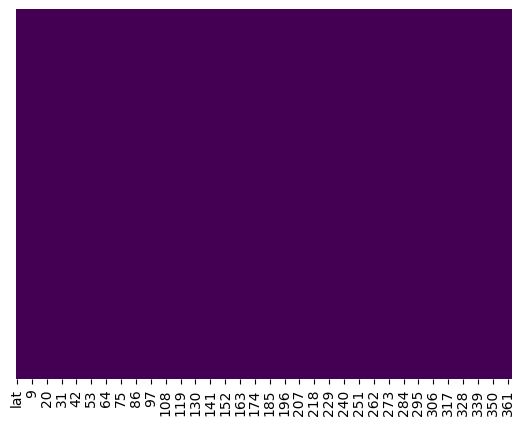

In [10]:
# Посмотрим на количество пустых ячеек
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Удалим столбцы содержащие в себе только одно значение
print(train_df.shape)
train_df = train_df[[c for c
        in list(train_df)
        if len(train_df[c].unique()) > 1]]


# Удалим дублирующиеся строки
train_df.drop_duplicates(inplace=True)
print(train_df.shape)

(3084, 367)
(3084, 367)


# Корреляция

In [12]:
# Построим матрицу корреляции
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# Уберем сильно коррелирующие признаки
print(train_df.shape)

corr_matrix = train_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
train_df = train_df.drop(to_drop, axis=1)

print(train_df.shape)

(3084, 367)
(3084, 73)


In [14]:
train_df.head()

,lat,lon,0,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,42,43,44,45,48,49,50,51,52,53,54,55,56,57,59,60,65,68,69,90,91,92,93,106,107,109,129,135,159,221,242,243,244,250,345,346,347,348,score,distance
0,56.228300,43.945535,0.142355,0.291666,0.112751,0.010147,0.064546,0.354221,0.938658,0.0,1.0,0.142045,0.185835,0.326386,0.2,0.440000,0.358042,0.271056,0.0000,0.408585,0.328133,0.347347,0.572361,0.768808,0.117826,0.323573,0.108872,0.146263,0.122516,0.633466,0.687482,0.041579,0.027741,0.025188,0.090073,0.035966,0.542260,0.061738,1.000000,0.585089,0.065421,0.499813,0.632785,0.420045,0.063845,0.283407,0.847353,0.094136,0.067438,0.630130,0.000000,0.474925,0.517032,0.087465,0.343240,0.411185,0.054667,0.071107,0.165290,1.0,0.454545,0.035966,0.034687,0.838258,0.0,1.0,0.418502,0.031410,0.039461,0.051389,0.046229,0.080523,0.070827
1,56.834244,53.141543,0.094093,0.437761,0.106110,0.056220,0.056762,0.190334,0.916042,0.0,1.0,0.028409,0.073850,0.114529,0.2,0.186667,0.361020,0.172709,0.1875,0.217806,0.237776,0.138542,0.236672,0.774252,0.080297,0.812616,0.048434,0.126127,0.269339,0.640407,0.689786,0.003155,0.936532,0.010473,0.032972,0.094357,0.096784,0.141142,1.000000,0.729067,0.136940,0.608589,0.549262,0.689240,0.163919,0.492930,0.619494,0.100801,0.075839,0.815065,0.215401,0.448279,0.585868,0.057635,0.637724,0.334141,0.015830,0.020429,0.184066,1.0,0.454545,0.094357,0.010044,0.778627,0.0,1.0,0.418502,0.072436,0.030799,0.055459,0.050457,0.104424,0.046923
2,45.042299,41.990170,0.151723,0.388125,0.178486,0.020507,0.063225,0.311401,0.934817,0.0,1.0,0.113636,0.144471,0.518635,0.2,0.342222,0.465341,0.294392,0.5000,0.249603,0.375090,0.277947,0.239105,0.883080,0.271268,0.723762,0.116820,0.234958,0.088724,0.558427,0.725996,0.118027,0.917523,0.020714,0.060870,0.021118,0.234616,0.038960,1.000000,0.387100,0.118575,0.012828,0.242530,0.204543,0.133216,0.285245,0.733409,0.189787,0.017032,0.630130,0.155221,0.448279,0.461907,0.193282,0.416398,0.337515,0.024346,0.020875,0.250473,1.0,0.454545,0.021118,0.015448,0.828130,0.0,1.0,0.418502,0.079487,0.027911,0.077430,0.069333,0.067615,0.036917
3,59.849408,30.387762,0.423663,0.570066,0.157089,0.032190,0.063586,0.249114,0.930858,0.0,1.0,0.113636,0.164649,0.323706,0.2,0.253333,0.106807,0.113167,0.0000,0.255962,0.109183,0.092956,0.222564,0.798398,0.234480,0.384851,0.183501,0.050792,0.312036,0.553897,0.689616,0.018940,0.681181,0.029818,0.129810,0.072054,0.601685,0.071256,0.733339,0.282223,0.122627,0.482163,0.695188,0.994721,0.160922,0.258779,0.961282,0.266332,0.094674,0.618936,0.251833,0.507404,0.977111,0.115654,0.517208,0.516301,0.039272,0.068177,0.173980,1.0,0.454545,0.072054,0.024919,0.817692,0.0,1.0,0.418502,0.062821,0.030799,0.050685,0.041455,0.088038,0.063061
4,59.839643,30.304308,0.489140,0.527301,0.118082,0.118855,0.059441,0.687776,0.782222,0.0,1.0,0.132576,0.112187,0.347827,0.2,0.226667,0.283576,0.387779,0.3750,0.383148,0.273374,0.291634,0.196292,0.804814,0.219076,0.549121,0.111285,0.159195,0.362563,0.562902,0.697806,0.076771,0.731184,0.030312,0.105252,0.079407,0.280090,0.080878,0.733339,0.294632,0.247354,0.494141,0.610584,0.972540,0.309736,0.377876,0.961282,0.520156,0.090071,0.495646,0.252425,0.454111,0.962582,0.281884,0.481356,0.439895,0.015728,0.013378,0.191465,1.0,0.454545,0.079407,0.009980,0.425781,0.0,1.0,0.418502,0.078205,0.059673,0.059898,0.059523,0.099686,0.012484


# Работа с выбросами

In [15]:
train_df_c = train_df.copy()

In [16]:
# Посмотрим сколько выбросов в каждом стобце
# В некоторых столбцах при малом кол-ве уникальных значений присутствует большое кол-во выбросов
std = train_df_c.std()
median = train_df_c.median()
(((train_df_c - median).abs()) > 3*std).sum()

lat          74
lon          85
0             4
7            15
8            24
9            46
10           29
11           27
12           32
13            3
14            4
15           59
16           86
18           11
20            4
21           26
22           15
23           23
24            0
25           28
26           28
27           42
29           50
30           14
31           61
32            2
33          100
35           13
36           40
37           78
38           27
39           88
40            0
42           30
43           67
44           20
45           26
48           41
49           95
50            6
51           50
52            1
53            0
54            0
55           59
56           15
57           52
59           75
60           68
65          128
68           49
69           67
90            5
91           59
92            2
93           18
106          71
107          46
109         122
129          16
135          17
159          24
221     

In [17]:
from scipy import stats
print(train_df_c[(np.abs(stats.zscore(train_df_c.loc[:, ~train_df_c.columns.isin(['score', 'lat', 'lon'])])) < 3).all(axis=1)].shape, '\n')

(2206, 73) 



<ipython-input-18-055ac5f07644>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


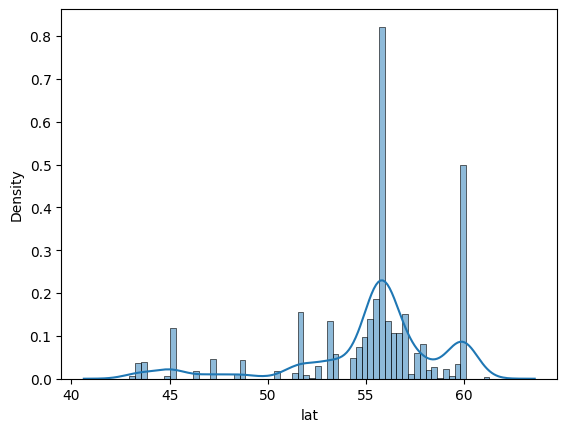

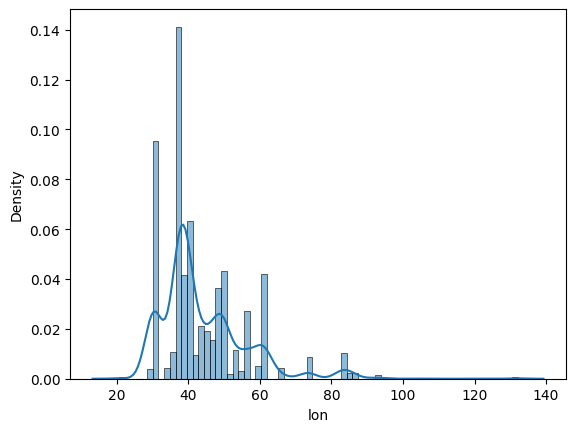

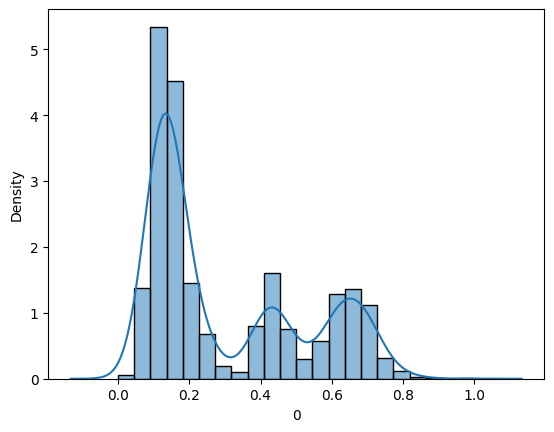

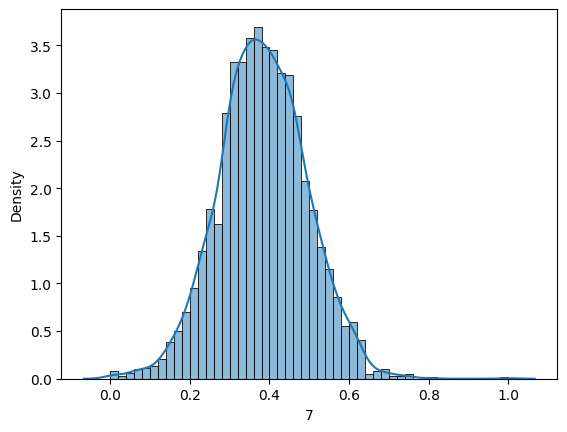

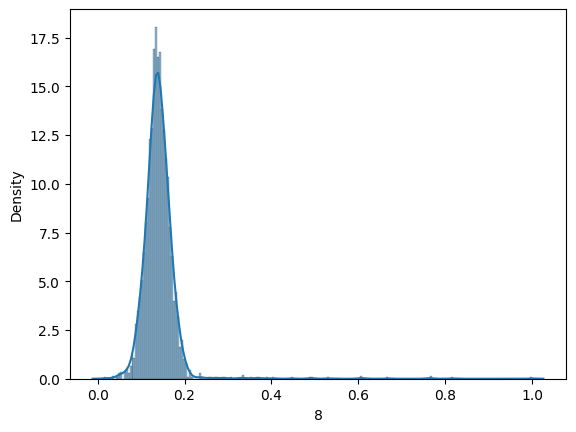

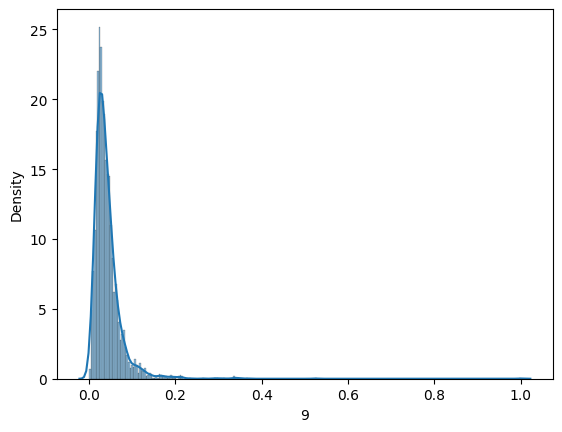

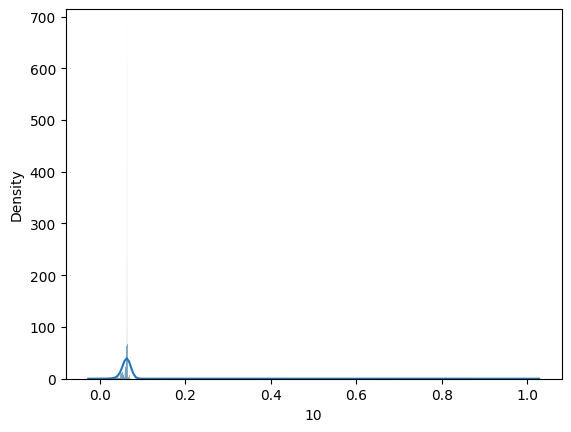

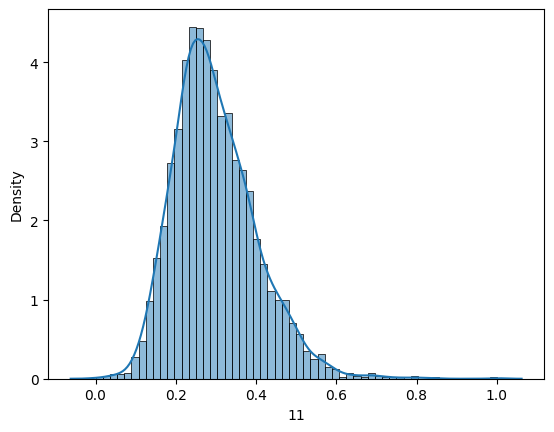

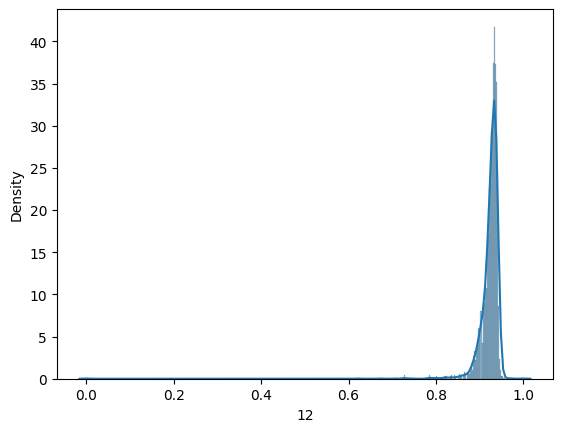

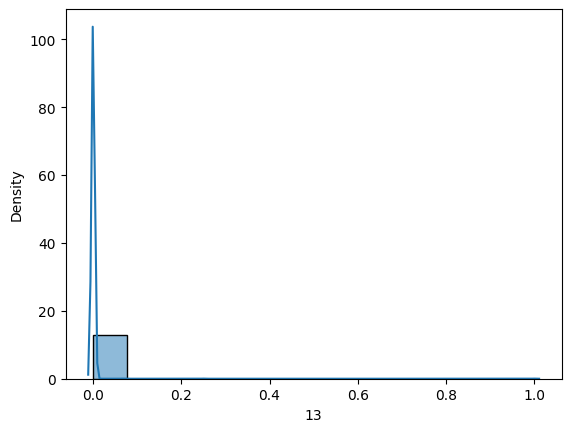

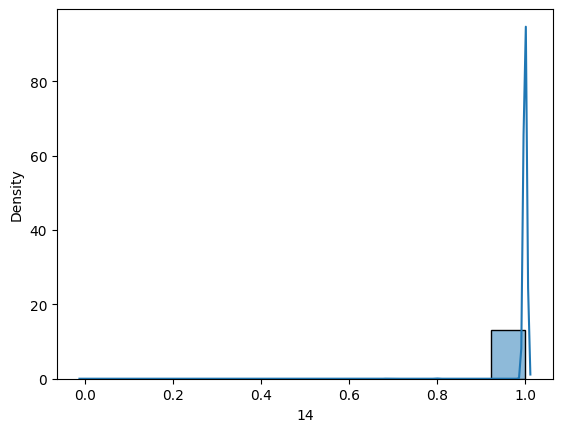

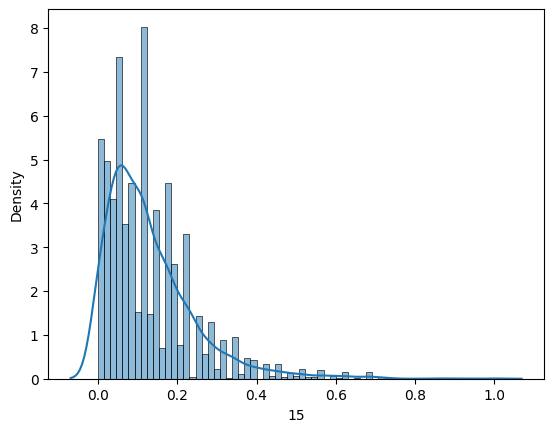

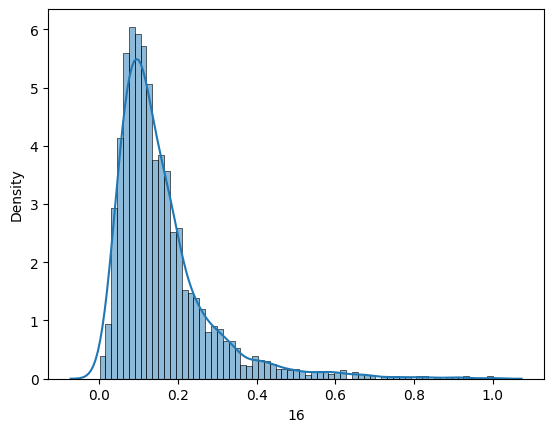

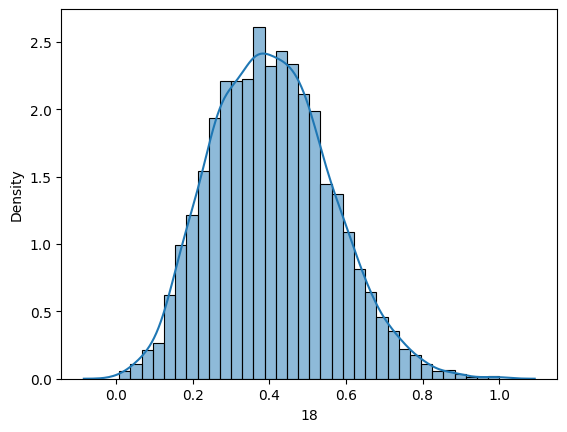

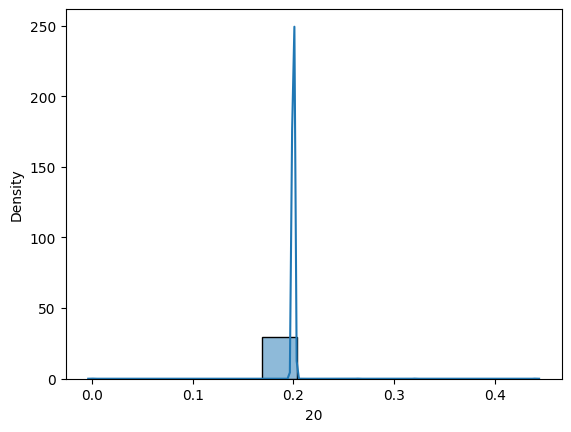

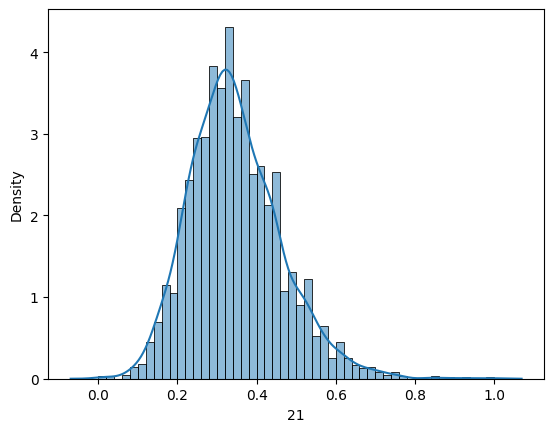

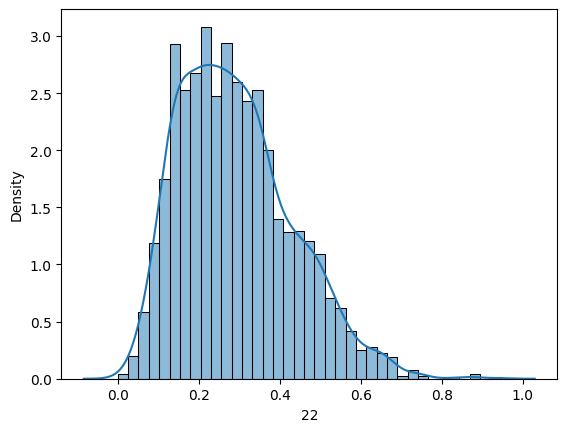

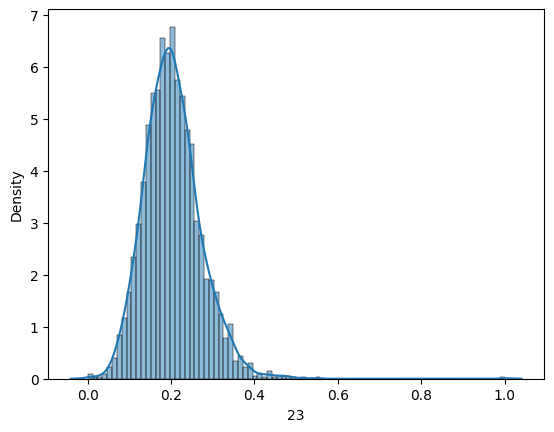

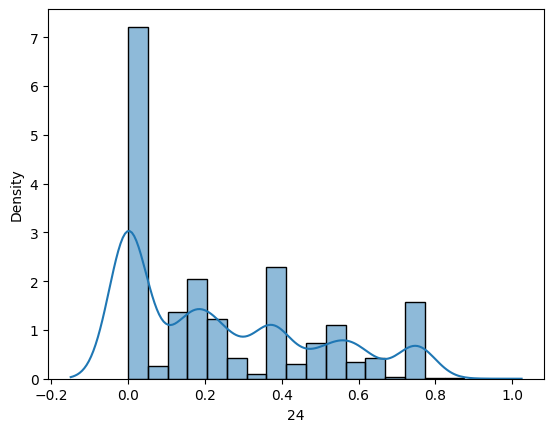

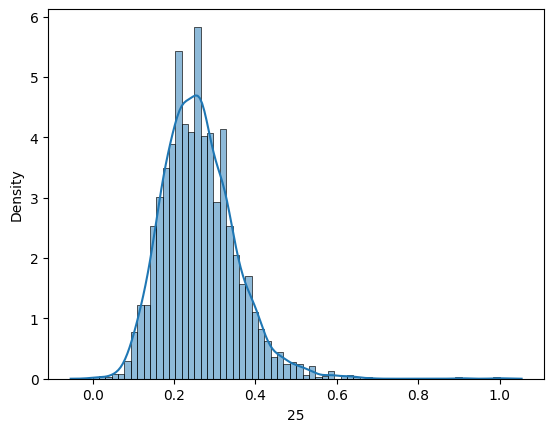

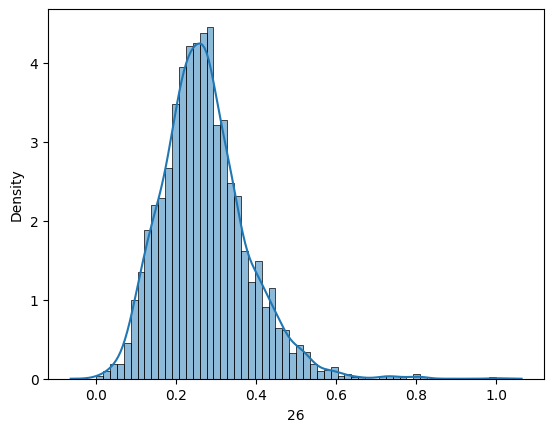

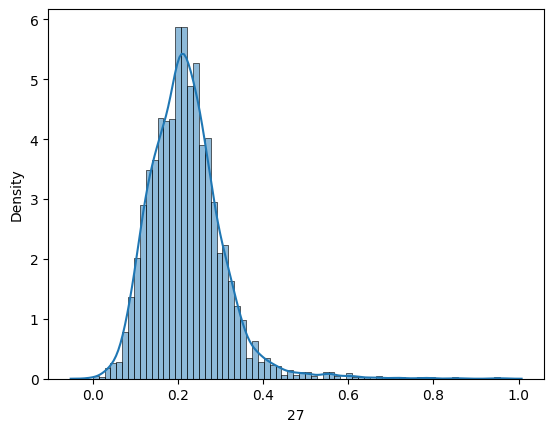

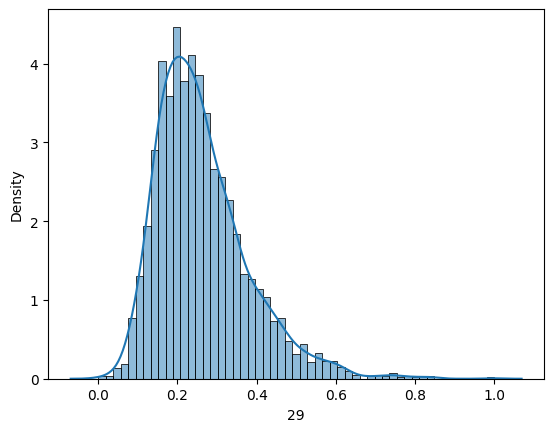

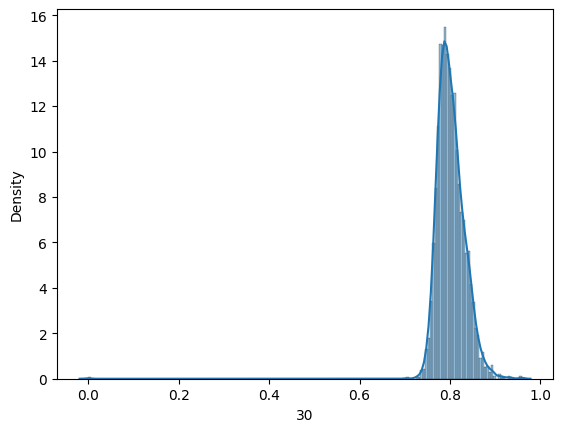

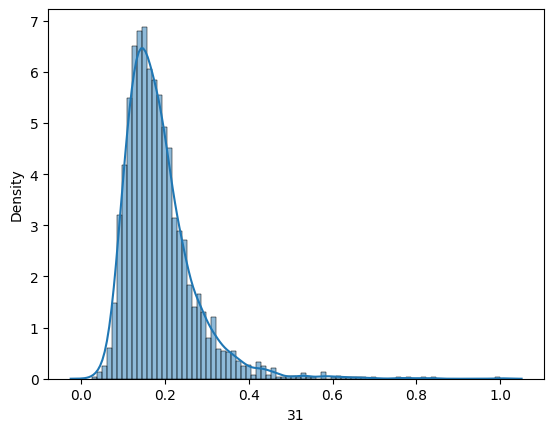

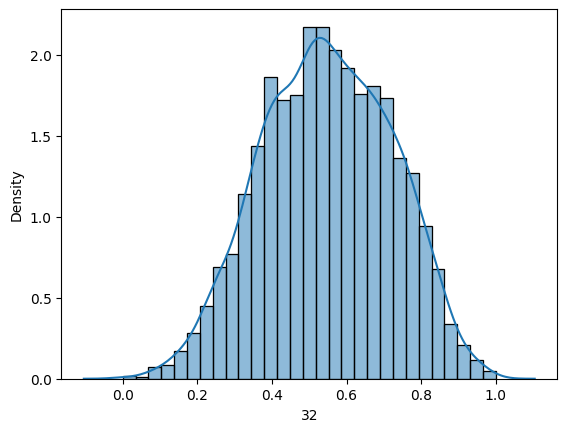

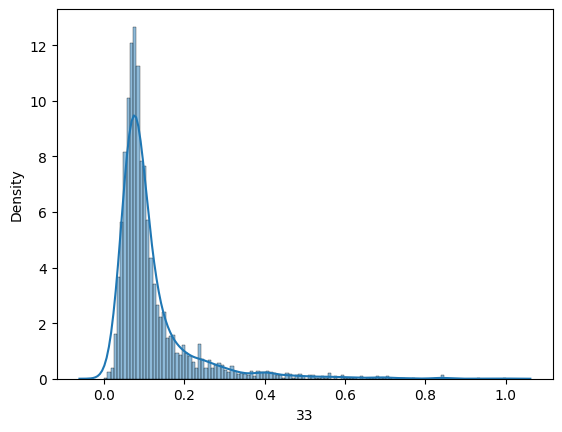

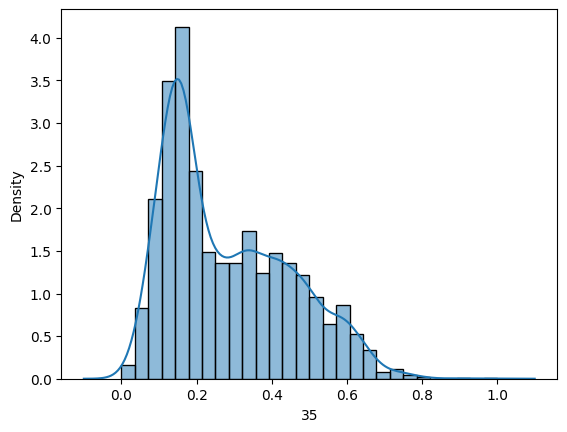

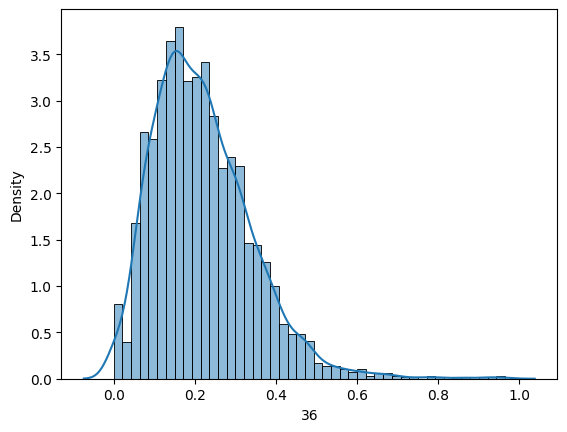

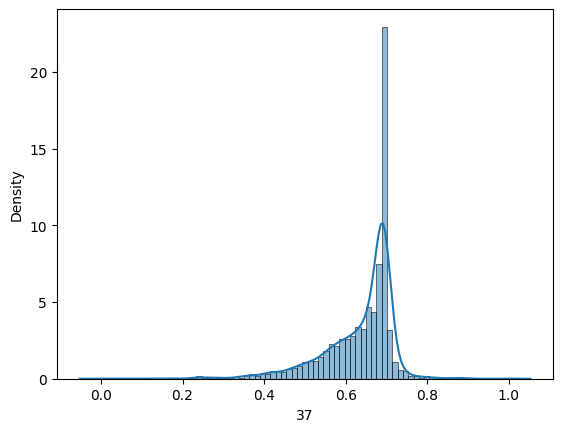

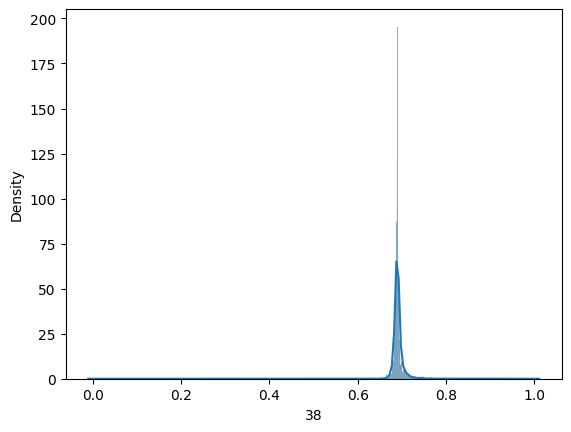

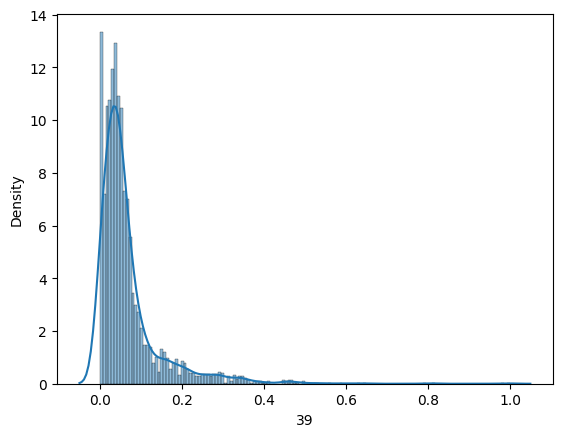

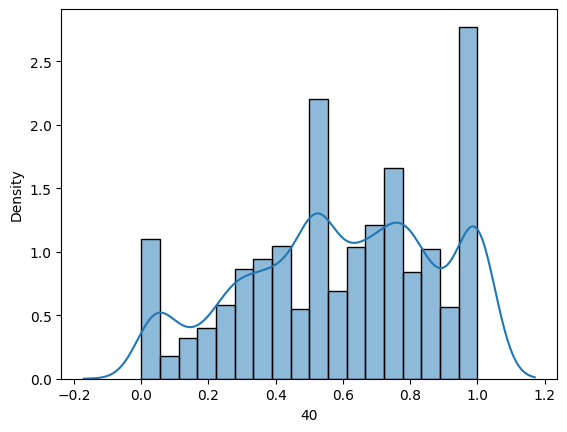

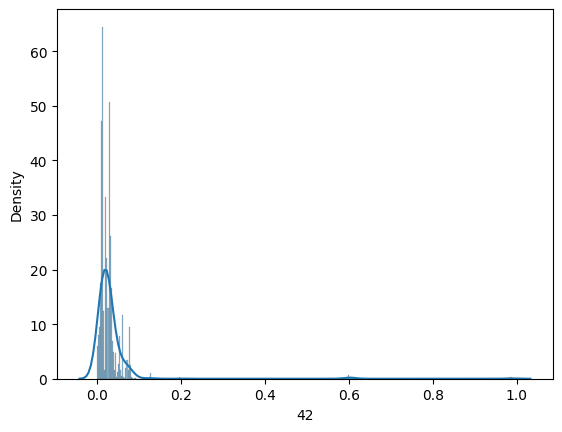

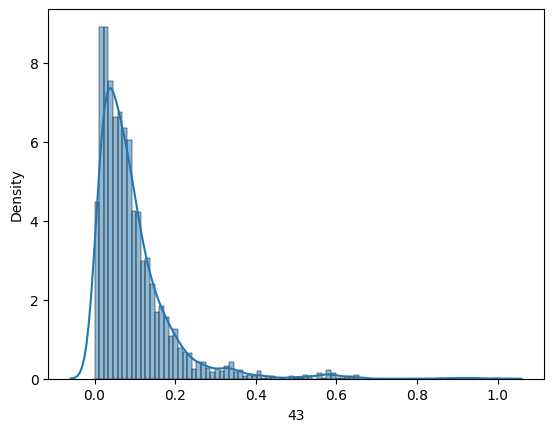

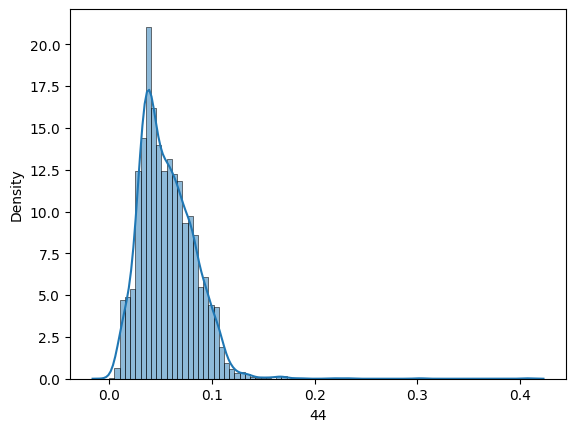

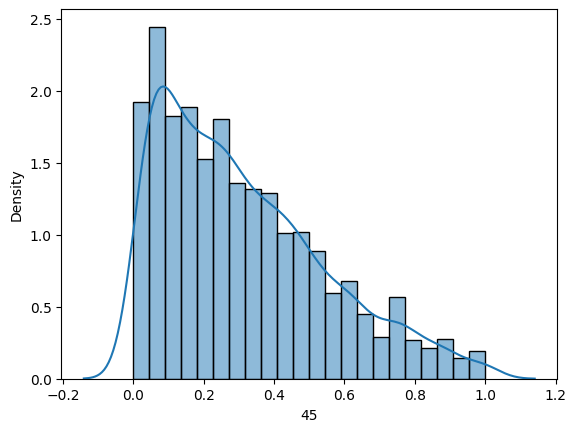

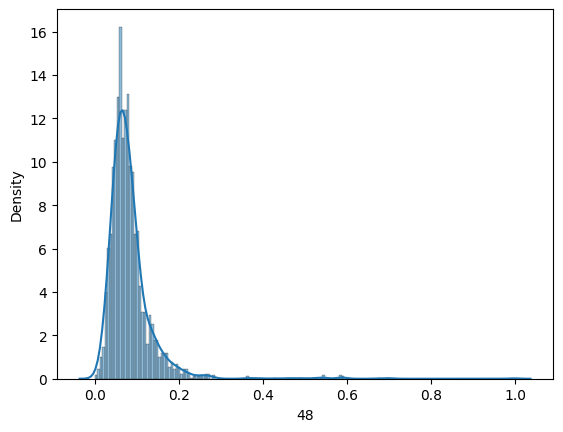

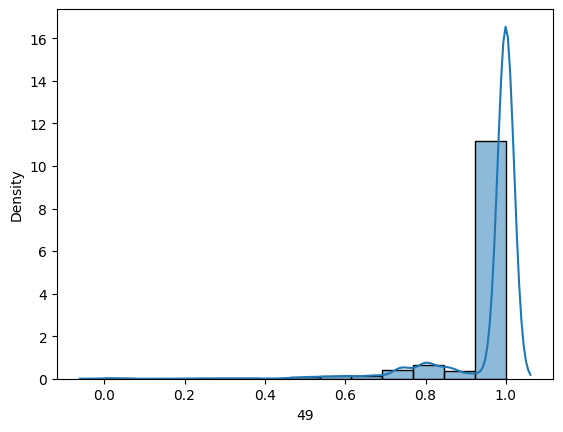

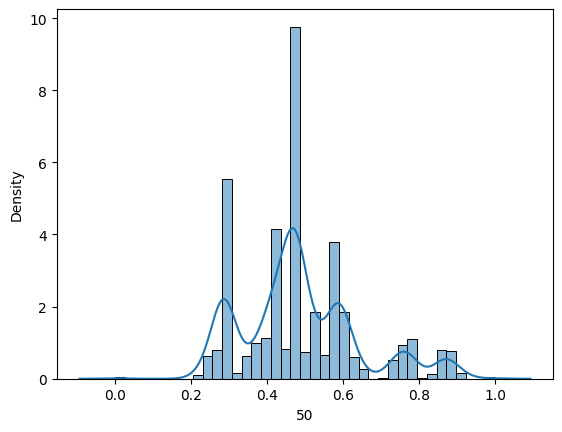

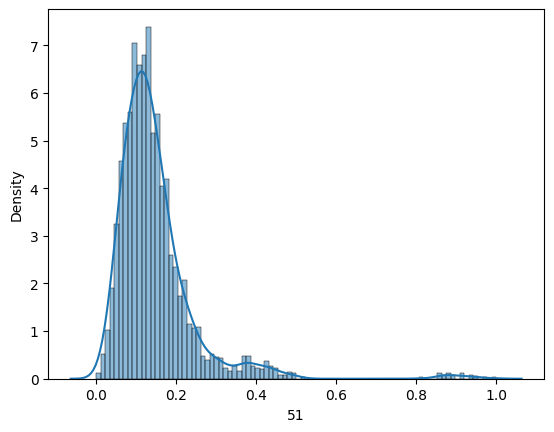

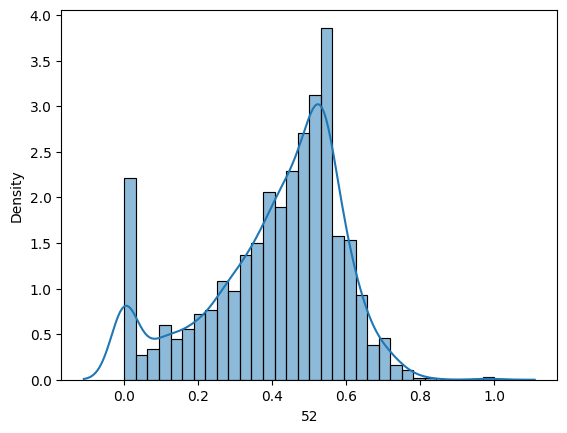

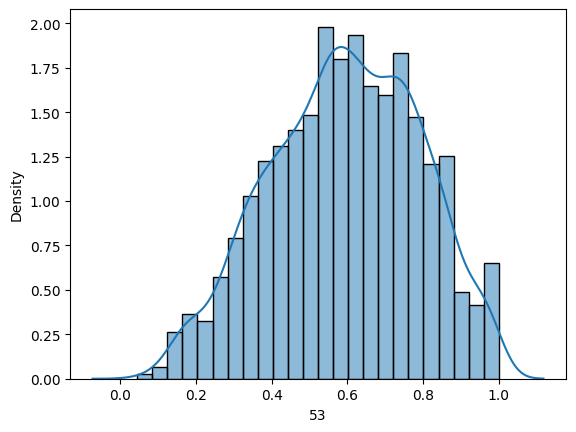

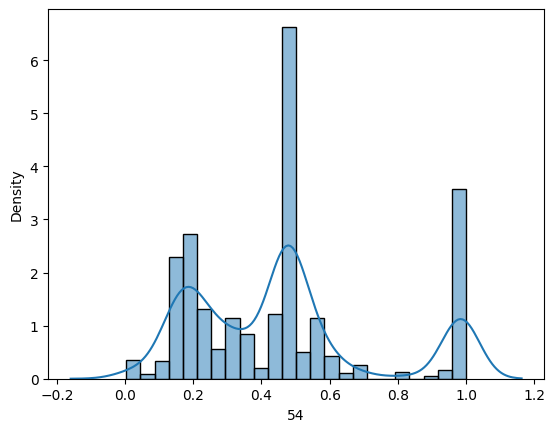

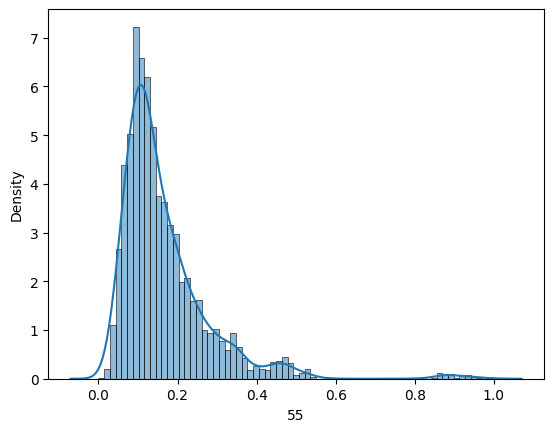

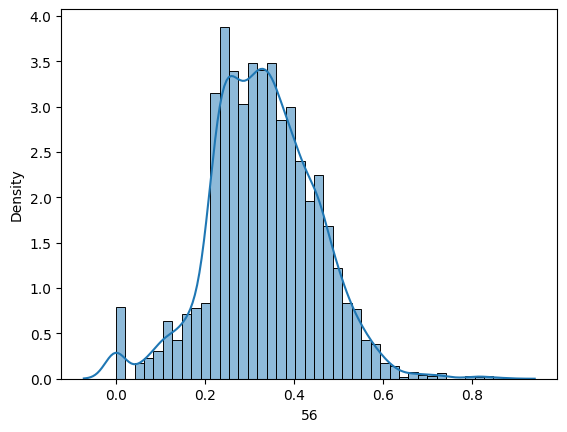

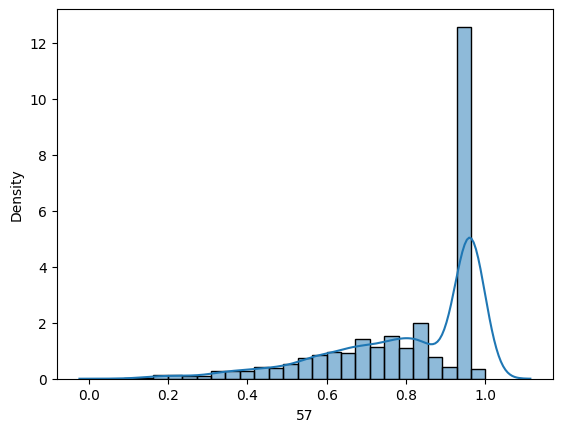

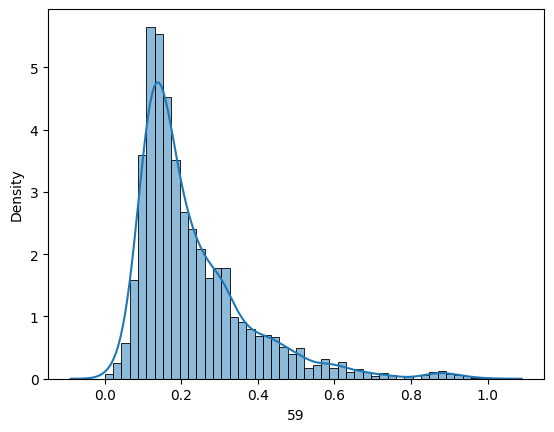

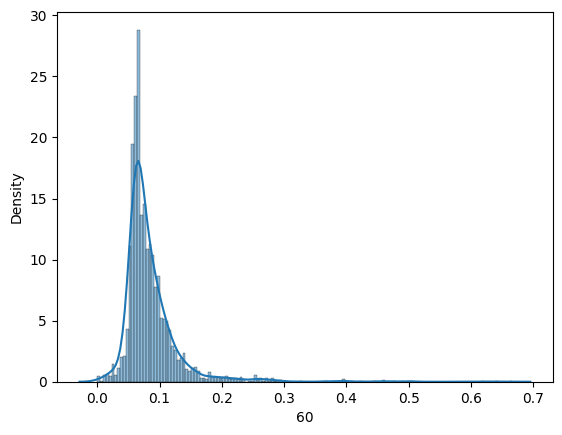

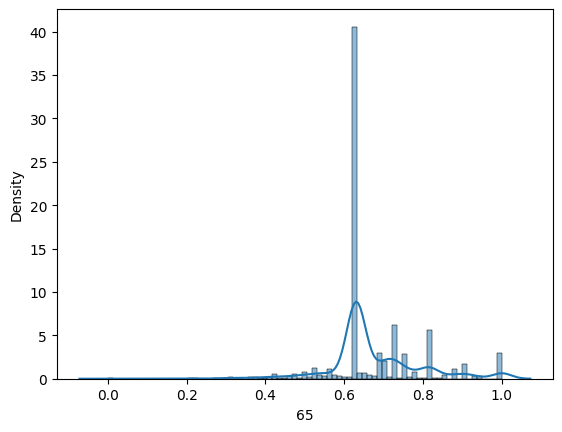

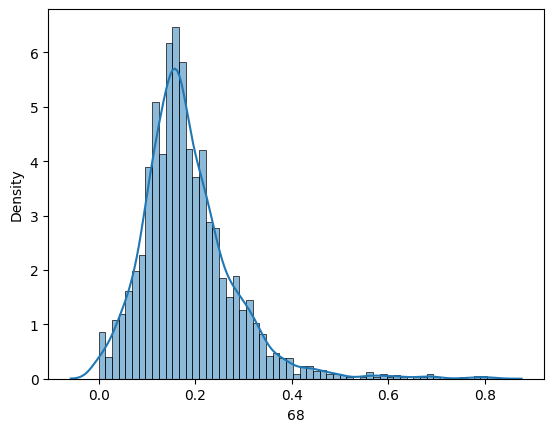

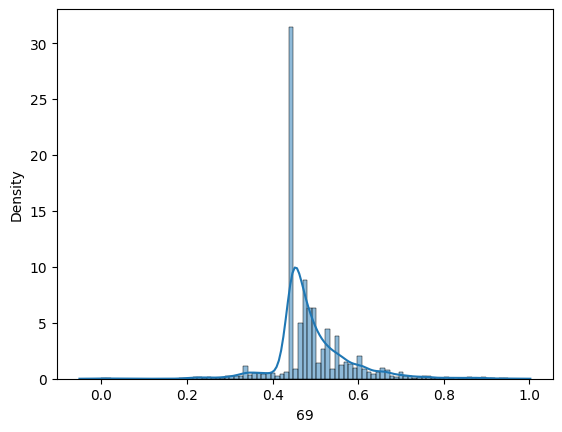

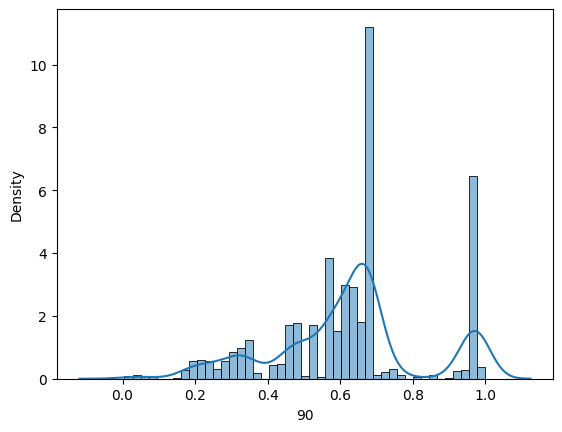

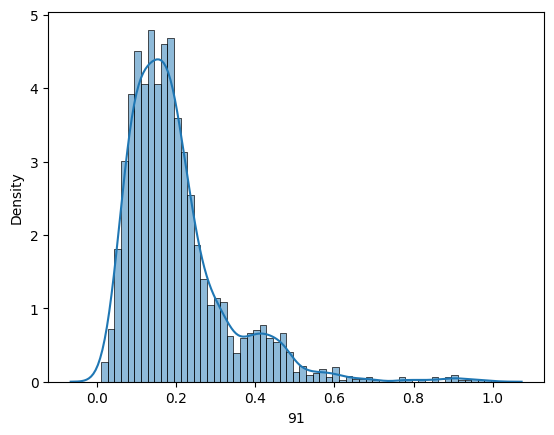

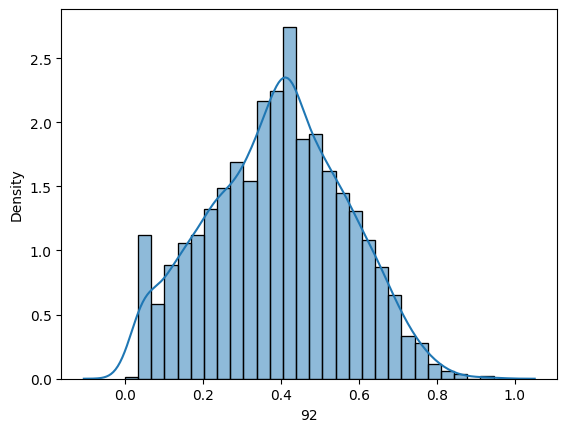

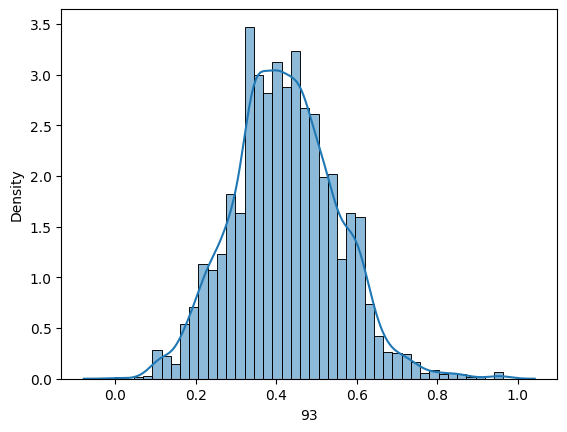

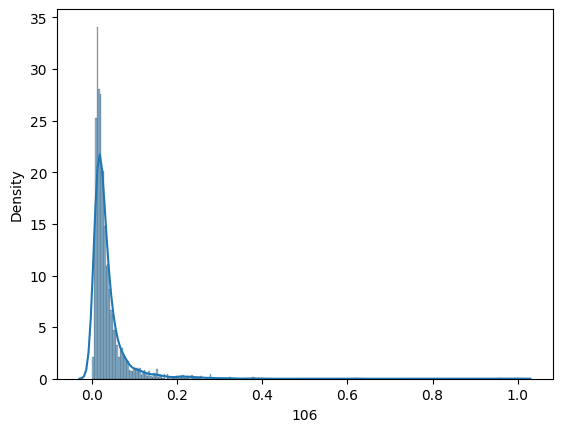

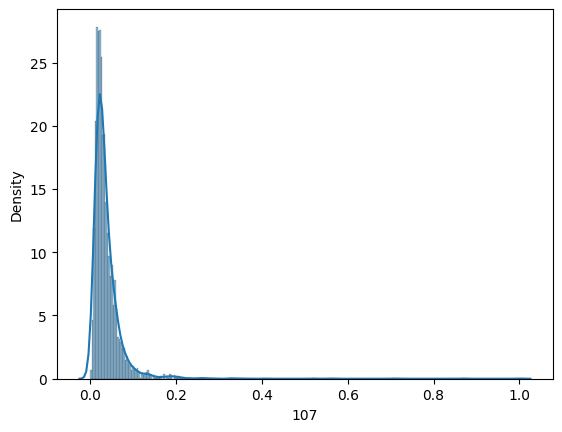

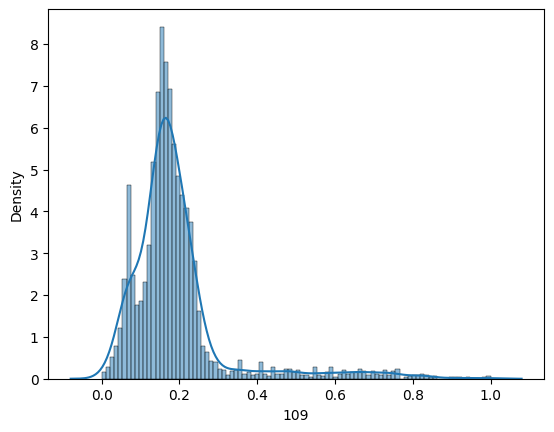

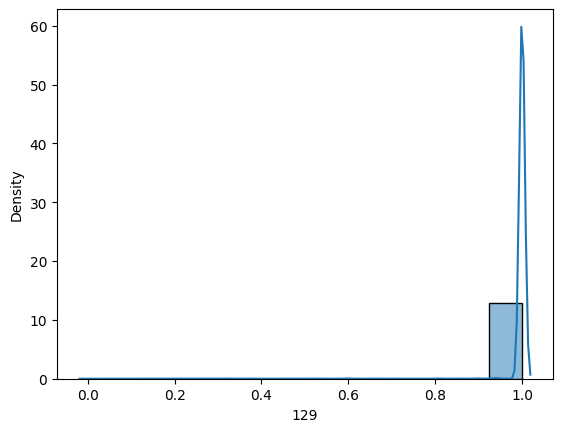

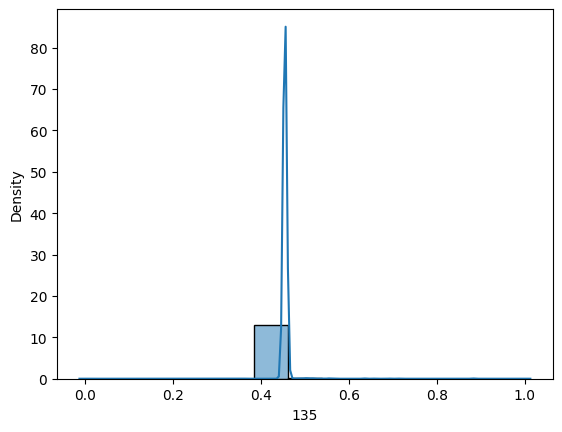

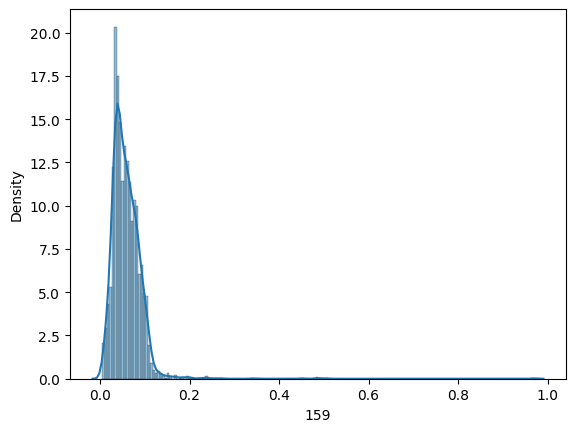

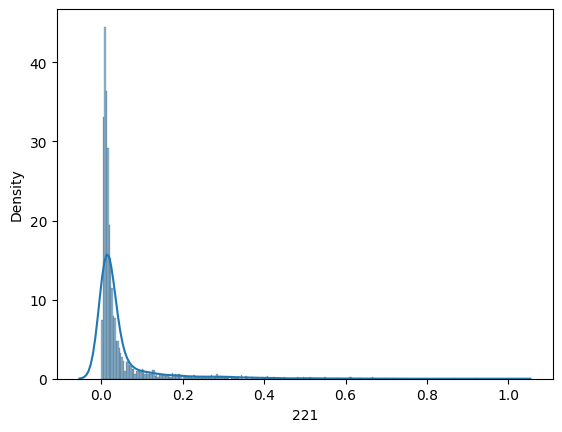

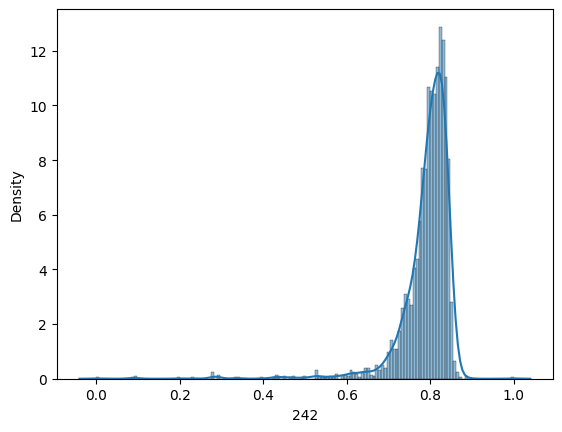

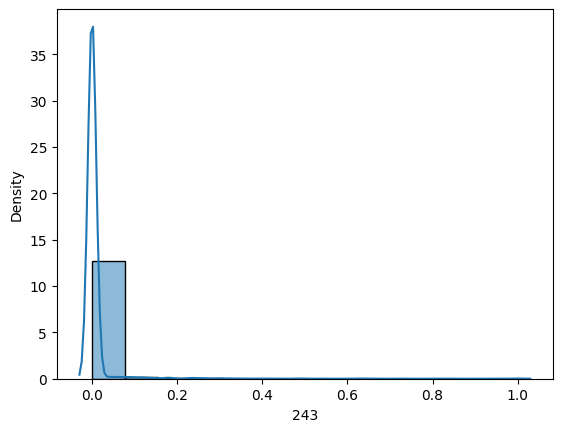

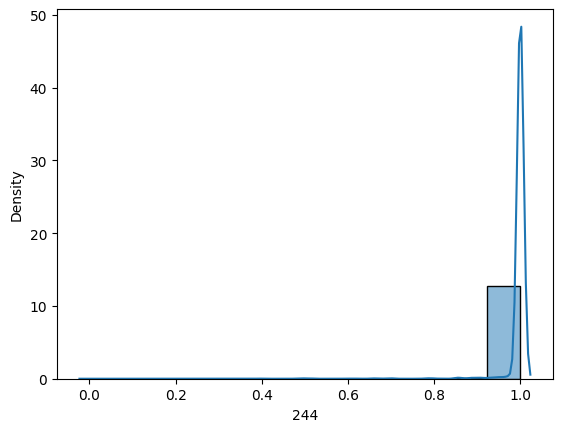

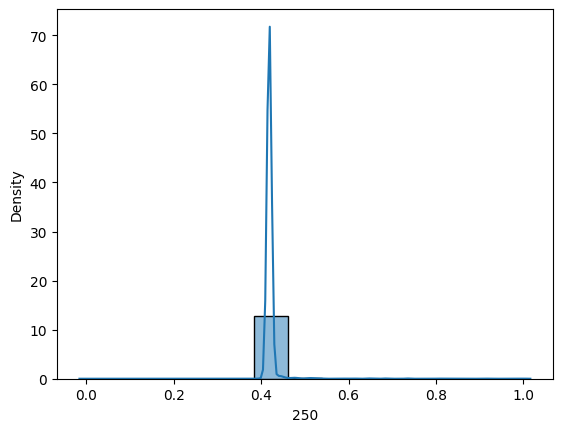

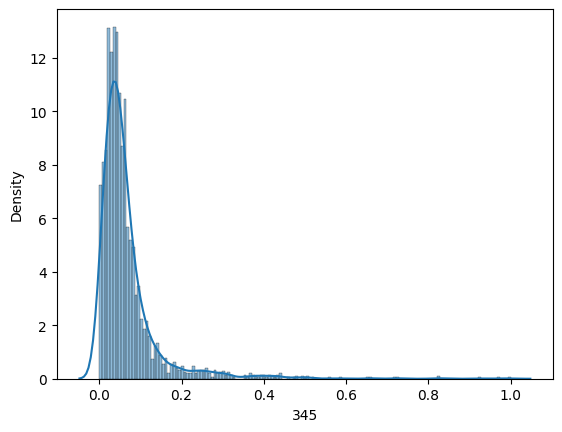

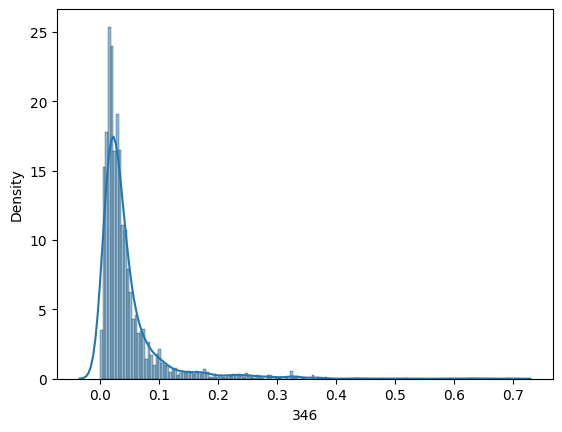

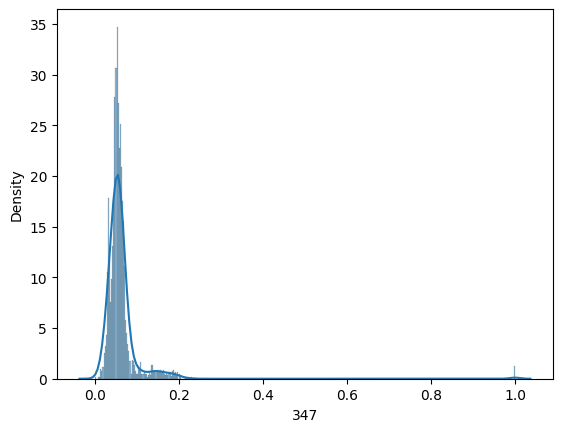

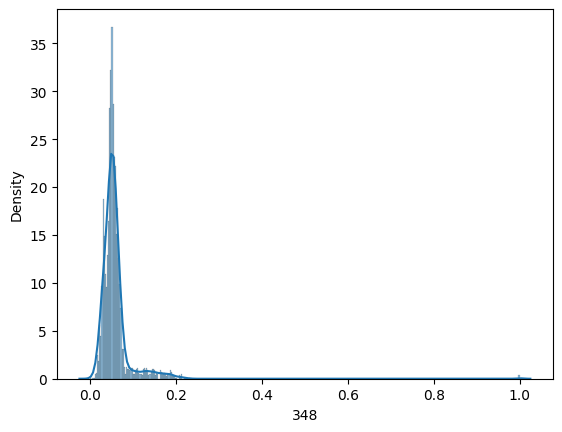

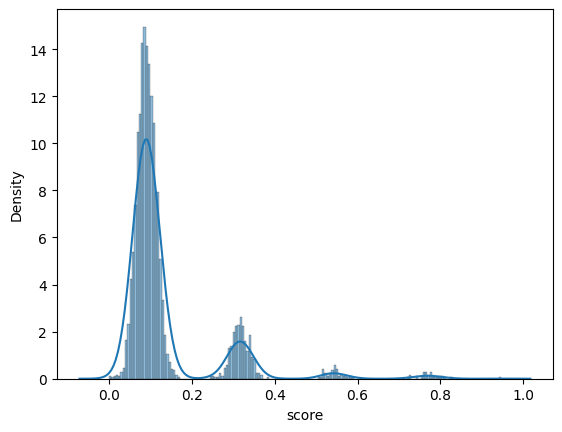

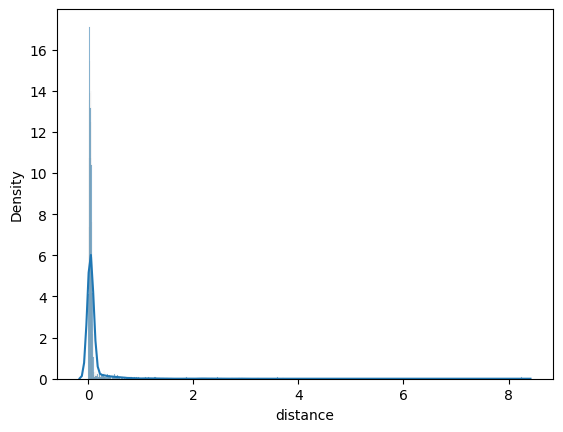

In [18]:
# Построим графики распределения для каждого из признаков
for i, col in enumerate(train_df.columns):
    plt.figure(i)
    sns.histplot(train_df[col], stat='density', kde=True, kde_kws={"cut": 3})

In [19]:
pd.options.mode.chained_assignment = None
def replace_numerical_outliers(column_name, z_thresh=3):
  median = column_name.median()
  std = column_name.std()
  outliers = ((column_name - median).abs()) > z_thresh*std
  column_name[outliers] = np.nan
  column_name.fillna(median, inplace=True)
  return column_name


# Заменять выбросы будем во всех столбцах, кроме выбраных на основании графиков и с учетом уникальных значений
for col in train_df_c.loc[:, ~train_df_c.columns.isin(['score', 'lat', 'lon', 'distance' '13', '14', '20', '49', '129', '135', '243', '244', '250'])]:
    train_df_c[col] =  replace_numerical_outliers(train_df_c[col])

In [20]:
# Выведем кол-во уникальных значений до замены и после замены выбросов на медиану
for col in train_df_c.loc[:, train_df_c.columns != 'target']:
  print(f'{col}   %5d   %5d' % (train_df[col].nunique(), train_df_c[col].nunique()))

train_df_c.shape

lat    3084    3084
lon    3084    3084
0    2795    2792
7    2795    2784
8    2795    2773
9    2731    2687
10    2641    2615
11    2795    2769
12    2795    2767
13       4       1
14       4       4
15     207     185
16     603     532
18    2795    2786
20       5       5
21     428     409
22    2795    2782
23    2795    2775
24     125     125
25     442     424
26    2795    2770
27    2795    2756
29     923     885
30    2795    2782
31    2795    2739
32    2795    2794
33    2795    2704
35    2795    2784
36    2750    2713
37    2513    2440
38    2559    2534
39    2560    2479
40     722     722
42    2795    2768
43    2795    2733
44    1944    1927
45    2220    2220
48    2551    2514
49     182     182
50    2795    2790
51    2795    2749
52    1472    1472
53    2107    2107
54    2795    2795
55    2795    2741
56    1366    1351
57     796     753
59    2795    2726
60    1430    1370
65     289     277
68    2180    2134
69     598     548
90    2795    

(3084, 73)

In [21]:
train_df = train_df_c.copy()

#Проверка точности алгоритма линейной регрессии с применением k-fold

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

X = train_df.loc[:, ~train_df.columns.isin(['score'])]
y = train_df['score']
print(X.shape)

(3084, 72)


In [23]:
k_val = 5


def k_fold(k_val, X, y):

  count_row_one_k = len(X) // k_val
  mae_all = []
  for i in range(k_val):

    x_train_t = np.concatenate([X[:i * count_row_one_k], X[(i + 1) * count_row_one_k:]], axis=0)
    y_train_t = np.concatenate([y[:i * count_row_one_k], y[(i + 1) * count_row_one_k:]], axis=0)

    x_val_t = X[i * count_row_one_k: (i + 1) * count_row_one_k]
    y_val_t = y[i * count_row_one_k: (i + 1) * count_row_one_k]

    reg = LinearRegression().fit(x_train_t, y_train_t)
    y_pred_t = reg.predict(x_val_t)

    mae_all.append(mae(y_val_t, y_pred_t))

  return mae_all, sum(mae_all) / len(mae_all)



print(k_fold(k_val, X, y))

([0.07578947784484168, 0.07553281659295959, 0.07816614313731735, 0.07103255710102375, 0.07565640296766245], 0.07523547952876096)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#Нормализация

In [24]:
X_c = X.copy()

In [25]:
X_c.describe()

,lat,lon,0,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,42,43,44,45,48,49,50,51,52,53,54,55,56,57,59,60,65,68,69,90,91,92,93,106,107,109,129,135,159,221,242,243,244,250,345,346,347,348,distance
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.0,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3.084000e+03,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,55.218066,43.942187,0.301911,0.383145,0.138450,0.038947,0.061799,0.294303,0.925284,0.0,0.999444,0.121218,0.144926,0.404318,0.200072,0.342123,0.289190,0.201535,0.242790,0.258411,0.266710,0.214631,0.255054,0.802028,0.179758,0.547949,0.103089,0.280255,2.120873e-01,0.643656,0.690487,0.058099,0.598697,0.026137,0.084000,0.055684,0.306224,0.078334,0.964048,0.487432,0.138693,0.409644,0.594027,0.459856,0.156023,0.330617,0.819119,0.214573,0.079884,0.662220,0.177783,0.486613,0.623000,0.188928,0.391109,0.419717,0.030917,0.033586,0.170357,0.997926,0.455639,0.057237,0.032722,0.797752,0.006401,0.995526,0.421012,0.057117,0.037683,0.059604,0.054336,0.068207
std,3.832649,12.074348,0.219503,0.107313,0.025920,0.023512,0.007562,0.095854,0.015129,0.0,0.019554,0.093682,0.088210,0.150617,0.006133,0.109191,0.134902,0.063216,0.247832,0.082627,0.097910,0.073454,0.102495,0.027734,0.066151,0.172460,0.062582,0.163125,1.091757e-01,0.071188,0.008164,0.054663,0.283915,0.019262,0.066956,0.024381,0.225511,0.037921,0.102065,0.153088,0.073809,0.181350,0.195960,0.271234,0.087850,0.115126,0.171673,0.117769,0.029655,0.096053,0.080181,0.069854,0.204954,0.104333,0.175032,0.125444,0.026913,0.022799,0.078742,0.031651,0.021577,0.025343,0.046778,0.041308,0.049233,0.038423,0.026258,0.047413,0.033343,0.029251,0.024476,0.104187
min,42.938677,20.472413,0.000000,0.053714,0.014407,0.000000,0.000000,0.000000,0.850335,0.0,0.000000,0.000000,0.000892,0.008763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.703866,0.026426,0.065347,0.000000,0.000000,9.598111e-10,0.408240,0.655245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224609,0.000000,0.000000,0.045280,0.003593,0.000000,0.000000,0.307693,0.000000,0.000000,0.275446,0.000000,0.222416,0.026693,0.010581,0.000000,0.066108,0.000000,0.000000,0.000000,0.000000,0.000000,0.005147,0.000000,0.605375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001799
25%,54.706904,37.512346,0.127758,0.311420,0.122423,0.022893,0.062155,0.227145,0.918920,0.0,1.000000,0.056818,0.082930,0.291939,0.200000,0.266667,0.183586,0.157410,0.000000,0.198728,0.200060,0.162586,0.181211,0.781770,0.131885,0.420894,0.065505,0.146144,1.311611e-01,0.605666,0.687157,0.024211,0.393761,0.012851,0.033655,0.036027,0.116741,0.053527,1.000000,0.396379,0.089872,0.313171,0.452117,0.220951,0.095543,0.253633,0.699688,0.129793,0.061799,0.630130,0.124133,0.448279,0.516675,0.113577,0.265215,0.335687,0.013719,0.018192,0.132103,1.000000,0.454545,0.037191,0.009372,0.780004,0.000000,1.000000,0.418502,0.026923,0.016362,0.045813,0.042215,0.026486
50%,55.788525,39.754105,0.176568,0.381816,0.138520,0.034036,0.063757,0.283522,0.929022,0.0,1.000000,0.113636,0.125908,0.400056,0.200000,0.333333,0.275091,0.198724,0.187500,0.255962,0.261609,0.212354,0.241051,0.798580,0.170159,0.547187,0.086097,0.236330,2.030096e-01,0.670415,0.689642,0.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Нормализуем выбранные признаки
no_normalize = ['lat', 'lon', 'distance']
scaler = MinMaxScaler()
X_c[no_normalize] = scaler.fit_transform(np.array(X_c[no_normalize]))

In [27]:
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [28]:
X_c.describe()

,lat,lon,0,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,29,30,31,32,33,35,36,37,38,39,40,42,43,44,45,48,49,50,51,52,53,54,55,56,57,59,60,65,68,69,90,91,92,93,106,107,109,129,135,159,221,242,243,244,250,345,346,347,348,distance
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.0,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3.084000e+03,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.669250,0.210393,0.301911,0.383145,0.138450,0.038947,0.061799,0.294303,0.925284,0.0,0.999444,0.121218,0.144926,0.404318,0.200072,0.342123,0.289190,0.201535,0.242790,0.258411,0.266710,0.214631,0.255054,0.802028,0.179758,0.547949,0.103089,0.280255,2.120873e-01,0.643656,0.690487,0.058099,0.598697,0.026137,0.084000,0.055684,0.306224,0.078334,0.964048,0.487432,0.138693,0.409644,0.594027,0.459856,0.156023,0.330617,0.819119,0.214573,0.079884,0.662220,0.177783,0.486613,0.623000,0.188928,0.391109,0.419717,0.030917,0.033586,0.170357,0.997926,0.455639,0.057237,0.032722,0.797752,0.006401,0.995526,0.421012,0.057117,0.037683,0.059604,0.054336,0.077607
std,0.208887,0.108240,0.219503,0.107313,0.025920,0.023512,0.007562,0.095854,0.015129,0.0,0.019554,0.093682,0.088210,0.150617,0.006133,0.109191,0.134902,0.063216,0.247832,0.082627,0.097910,0.073454,0.102495,0.027734,0.066151,0.172460,0.062582,0.163125,1.091757e-01,0.071188,0.008164,0.054663,0.283915,0.019262,0.066956,0.024381,0.225511,0.037921,0.102065,0.153088,0.073809,0.181350,0.195960,0.271234,0.087850,0.115126,0.171673,0.117769,0.029655,0.096053,0.080181,0.069854,0.204954,0.104333,0.175032,0.125444,0.026913,0.022799,0.078742,0.031651,0.021577,0.025343,0.046778,0.041308,0.049233,0.038423,0.026258,0.047413,0.033343,0.029251,0.024476,0.121755
min,0.000000,0.000000,0.000000,0.053714,0.014407,0.000000,0.000000,0.000000,0.850335,0.0,0.000000,0.000000,0.000892,0.008763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.703866,0.026426,0.065347,0.000000,0.000000,9.598111e-10,0.408240,0.655245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224609,0.000000,0.000000,0.045280,0.003593,0.000000,0.000000,0.307693,0.000000,0.000000,0.275446,0.000000,0.222416,0.026693,0.010581,0.000000,0.066108,0.000000,0.000000,0.000000,0.000000,0.000000,0.005147,0.000000,0.605375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.641390,0.152753,0.127758,0.311420,0.122423,0.022893,0.062155,0.227145,0.918920,0.0,1.000000,0.056818,0.082930,0.291939,0.200000,0.266667,0.183586,0.157410,0.000000,0.198728,0.200060,0.162586,0.181211,0.781770,0.131885,0.420894,0.065505,0.146144,1.311611e-01,0.605666,0.687157,0.024211,0.393761,0.012851,0.033655,0.036027,0.116741,0.053527,1.000000,0.396379,0.089872,0.313171,0.452117,0.220951,0.095543,0.253633,0.699688,0.129793,0.061799,0.630130,0.124133,0.448279,0.516675,0.113577,0.265215,0.335687,0.013719,0.018192,0.132103,1.000000,0.454545,0.037191,0.009372,0.780004,0.000000,1.000000,0.418502,0.026923,0.016362,0.045813,0.042215,0.028850
50%,0.700341,0.172850,0.176568,0.381816,0.138520,0.034036,0.063757,0.283522,0.929022,0.0,1.000000,0.113636,0.125908,0.400056,0.200000,0.333333,0.275091,0.198724,0.187500,0.255962,0.261609,0.212354,0.241051,0.798580,0.170159,0.547187,0.086097,0.236330,2.030096e-01,0.670415,0.689642,0.045073,0.

In [29]:
k_fold(k_val, X_c, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


([0.0759832668107872,
  0.07553281659295957,
  0.0781646941723339,
  0.07103255710102392,
  0.07565785539042448],
 0.07527423801350581)

In [30]:
X = X_c.copy()

# Отбор признаков деревом решений

In [31]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(X, y)

DecisionTreeRegressor()

In [32]:
clf.feature_importances_

array([7.13264446e-02, 1.12272092e-01, 3.53927760e-02, 1.27777916e-02,
       1.35448145e-02, 1.85233220e-03, 1.71035567e-02, 1.06696782e-02,
       2.47430727e-02, 0.00000000e+00, 0.00000000e+00, 3.13286995e-03,
       2.19896554e-03, 4.98926226e-02, 0.00000000e+00, 1.93150918e-02,
       3.00669820e-03, 1.11501222e-02, 6.16288871e-03, 4.34177949e-03,
       1.66003401e-02, 8.65307323e-03, 2.12712505e-02, 1.35318241e-02,
       1.62388962e-02, 8.52117612e-03, 4.19857701e-02, 1.88750648e-02,
       1.73509593e-03, 4.30550496e-03, 7.34946296e-03, 1.25542807e-02,
       1.07618081e-02, 6.29416959e-02, 7.49031762e-03, 9.69329463e-03,
       1.11194947e-02, 4.41667065e-03, 9.58118122e-05, 1.59211325e-02,
       6.69574654e-03, 7.13099133e-03, 8.84877243e-03, 1.47913116e-02,
       2.97638872e-02, 7.09141735e-03, 6.57091721e-04, 1.58160726e-02,
       3.79685637e-03, 2.18579955e-03, 3.03464444e-03, 4.47457070e-03,
       1.82236169e-02, 1.21917745e-02, 5.73850863e-03, 1.66716200e-02,
      

<Axes: >

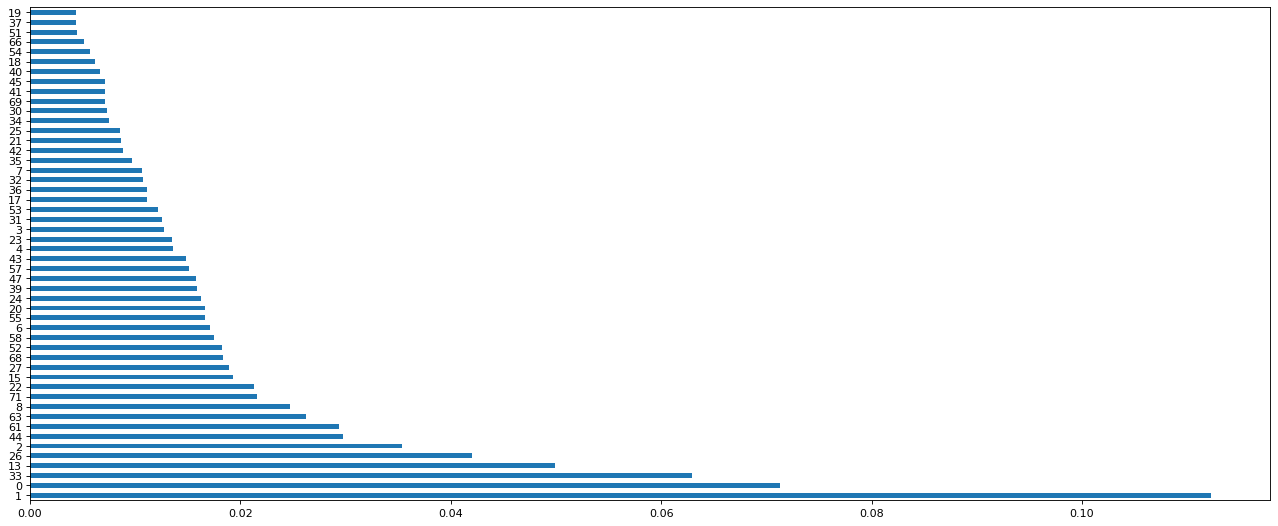

In [33]:
count_features = 50
plt.figure(num=None, figsize=(20,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_)
feat_importances.nlargest(count_features).plot(kind='barh')

In [34]:
imp_features_idx = np.array(feat_importances.sort_values()[-count_features:].index)

In [35]:
imp_features_idx =np.sort(imp_features_idx)

In [36]:
from sklearn.ensemble import RandomForestRegressor

k_fold(k_val, X.iloc[:, imp_features_idx], y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


([0.07452884571942295,
  0.07355658033954422,
  0.07666783388885728,
  0.06939004850973174,
  0.075333256527899],
 0.07389531299709104)

In [37]:
X = X.iloc[:, imp_features_idx]
X.head()

,lat,lon,0,7,8,10,11,12,18,21,23,24,25,26,27,29,30,31,32,33,35,38,39,40,42,43,44,45,48,50,51,52,53,54,55,56,59,69,90,91,92,93,107,109,159,242,250,346,347,distance
0,0.724309,0.210423,0.142355,0.291666,0.112751,0.064546,0.354221,0.938658,0.326386,0.440000,0.271056,0.0000,0.408585,0.328133,0.347347,0.572361,0.768808,0.117826,0.323573,0.108872,0.146263,0.687482,0.041579,0.027741,0.025188,0.090073,0.035966,0.542260,0.061738,0.585089,0.065421,0.499813,0.632785,0.420045,0.063845,0.283407,0.094136,0.474925,0.517032,0.087465,0.343240,0.411185,0.071107,0.165290,0.035966,0.838258,0.418502,0.039461,0.051389,0.080668
1,0.757334,0.292860,0.094093,0.437761,0.106110,0.056762,0.190334,0.916042,0.114529,0.186667,0.172709,0.1875,0.217806,0.237776,0.138542,0.236672,0.774252,0.080297,0.812616,0.048434,0.126127,0.689786,0.003155,0.936532,0.010473,0.032972,0.094357,0.096784,0.141142,0.729067,0.136940,0.608589,0.549262,0.689240,0.163919,0.492930,0.100801,0.448279,0.585868,0.057635,0.637724,0.334141,0.020429,0.184066,0.094357,0.778627,0.418502,0.030799,0.055459,0.052733
2,0.114651,0.192895,0.151723,0.388125,0.178486,0.063225,0.311401,0.934817,0.518635,0.342222,0.294392,0.5000,0.249603,0.375090,0.277947,0.239105,0.883080,0.271268,0.723762,0.116820,0.234958,0.725996,0.118027,0.917523,0.020714,0.060870,0.021118,0.234616,0.038960,0.387100,0.118575,0.012828,0.242530,0.204543,0.133216,0.285245,0.189787,0.448279,0.461907,0.193282,0.416398,0.337515,0.020875,0.250473,0.021118,0.828130,0.418502,0.027911,0.077430,0.041041
3,0.921666,0.088886,0.423663,0.570066,0.157089,0.063586,0.249114,0.930858,0.323706,0.253333,0.113167,0.0000,0.255962,0.109183,0.092956,0.222564,0.798398,0.234480,0.384851,0.183501,0.050792,0.689616,0.018940,0.681181,0.029818,0.129810,0.072054,0.601685,0.071256,0.282223,0.122627,0.482163,0.695188,0.994721,0.160922,0.258779,0.266332,0.507404,0.977111,0.115654,0.517208,0.516301,0.068177,0.173980,0.072054,0.817692,0.418502,0.030799,0.050685,0.071593
4,0.921134,0.088137,0.489140,0.527301,0.118082,0.059441,0.283522,0.929021,0.347827,0.226667,0.387779,0.3750,0.383148,0.273374,0.291634,0.196292,0.804814,0.219076,0.549121,0.111285,0.159195,0.697806,0.076771,0.731184,0.030312,0.105252,0.079407,0.280090,0.080878,0.294632,0.247354,0.494141,0.610584,0.972540,0.309736,0.377876,0.520156,0.454111,0.962582,0.281884,0.481356,0.439895,0.013378,0.191465,0.079407,0.805500,0.418502,0.059673,0.059898,0.012488


In [38]:
pd.concat([X, y], axis=1).to_csv('data_preprocessing/final_train.csv', index=False)

In [39]:
test_df = pd.read_csv('data_preprocessing/test_with_features.csv')
test_df = test_df.drop('Unnamed: 0', axis=1)

In [40]:
X_test = test_df[X.columns]

In [41]:
X_test.head()

,lat,lon,0,7,8,10,11,12,18,21,23,24,25,26,27,29,30,31,32,33,35,38,39,40,42,43,44,45,48,50,51,52,53,54,55,56,59,69,90,91,92,93,107,109,159,242,250,346,347,distance
0,55.782276,49.148234,0.146952,0.261271,0.139955,0.064238,0.295245,0.934421,0.693305,0.626667,0.258723,0.0000,0.313196,0.310283,0.211156,0.290674,0.864086,0.209341,0.530422,0.098885,0.224655,0.695418,0.118385,0.617417,0.022916,0.127685,0.036027,0.422628,0.025554,0.422725,0.145321,0.521726,0.765271,0.194321,0.181946,0.247016,0.196606,0.792556,0.576810,0.203019,0.354554,0.740736,0.043995,0.204447,0.036027,0.827087,0.418502,0.041386,0.066299,0.053279
1,56.841500,35.853059,0.164010,0.473970,0.162584,0.054698,0.262516,0.937259,0.231830,0.280000,0.059925,0.3750,0.084261,0.189755,0.141540,0.121370,0.745480,0.048926,0.759204,0.044292,0.429090,0.690000,0.000000,1.000000,0.027390,0.007683,0.106121,0.010044,0.125472,0.622769,0.098385,0.654760,0.218769,0.291674,0.135232,0.644006,0.268717,0.448279,0.626060,0.065367,0.846978,0.224652,0.019026,0.022728,0.106121,0.725120,0.418502,0.004812,0.025018,0.056490
2,55.356780,86.156697,0.063202,0.140951,0.143362,0.063745,0.231453,0.922739,0.494384,0.300000,0.170659,0.0000,0.270270,0.236564,0.178936,0.214780,0.788869,0.108392,0.774812,0.048675,0.111332,0.690219,0.006374,1.000000,0.035978,0.211198,0.079101,0.641891,0.132855,0.917498,0.240512,0.450677,0.712889,0.266528,0.097560,0.356188,0.120268,0.448279,0.671514,0.082540,0.520266,0.355655,0.045516,0.059062,0.109337,0.729383,0.418502,0.044273,0.038679,0.043265
3,56.755087,60.703962,0.211098,0.321755,0.110026,0.063746,0.330669,0.940550,0.268167,0.266667,0.211910,0.0000,0.322734,0.293781,0.242809,0.360731,0.784889,0.127734,0.306988,0.053140,0.309008,0.688834,0.013842,0.775583,0.075088,0.144113,0.074260,0.465432,0.065089,0.587298,0.118920,0.469757,0.905316,0.250563,0.130009,0.000000,0.150713,0.448279,0.687415,0.118501,0.232044,0.522812,0.042143,0.073088,0.074260,0.843246,0.418502,0.023099,0.032702,0.078920
4,59.907438,30.250297,0.521361,0.670583,0.150139,0.062408,0.379616,0.939097,0.313981,0.193333,0.226767,0.1875,0.303657,0.137537,0.140865,0.140344,0.773573,0.168942,0.482051,0.068871,0.159680,0.682606,0.035168,0.760886,0.028035,0.012586,0.089700,0.032806,0.070921,0.288341,0.186011,0.529071,0.722969,0.977291,0.304374,0.352880,0.451354,0.492623,0.965617,0.276735,0.510496,0.464559,0.008828,0.159251,0.089700,0.736128,0.418502,0.021174,0.053208,0.074994


In [42]:
X_test[no_normalize] = scaler.transform(np.array(X_test[no_normalize]))

In [43]:
X_test.head()

,lat,lon,0,7,8,10,11,12,18,21,23,24,25,26,27,29,30,31,32,33,35,38,39,40,42,43,44,45,48,50,51,52,53,54,55,56,59,69,90,91,92,93,107,109,159,242,250,346,347,distance
0,0.700000,0.257063,0.146952,0.261271,0.139955,0.064238,0.295245,0.934421,0.693305,0.626667,0.258723,0.0000,0.313196,0.310283,0.211156,0.290674,0.864086,0.209341,0.530422,0.098885,0.224655,0.695418,0.118385,0.617417,0.022916,0.127685,0.036027,0.422628,0.025554,0.422725,0.145321,0.521726,0.765271,0.194321,0.181946,0.247016,0.196606,0.792556,0.576810,0.203019,0.354554,0.740736,0.043995,0.204447,0.036027,0.827087,0.418502,0.041386,0.066299,0.060162
1,0.757730,0.137879,0.164010,0.473970,0.162584,0.054698,0.262516,0.937259,0.231830,0.280000,0.059925,0.3750,0.084261,0.189755,0.141540,0.121370,0.745480,0.048926,0.759204,0.044292,0.429090,0.690000,0.000000,1.000000,0.027390,0.007683,0.106121,0.010044,0.125472,0.622769,0.098385,0.654760,0.218769,0.291674,0.135232,0.644006,0.268717,0.448279,0.626060,0.065367,0.846978,0.224652,0.019026,0.022728,0.106121,0.725120,0.418502,0.004812,0.025018,0.063913
2,0.676810,0.588823,0.063202,0.140951,0.143362,0.063745,0.231453,0.922739,0.494384,0.300000,0.170659,0.0000,0.270270,0.236564,0.178936,0.214780,0.788869,0.108392,0.774812,0.048675,0.111332,0.690219,0.006374,1.000000,0.035978,0.211198,0.079101,0.641891,0.132855,0.917498,0.240512,0.450677,0.712889,0.266528,0.097560,0.356188,0.120268,0.448279,0.671514,0.082540,0.520266,0.355655,0.045516,0.059062,0.109337,0.729383,0.418502,0.044273,0.038679,0.048458
3,0.753020,0.360653,0.211098,0.321755,0.110026,0.063746,0.330669,0.940550,0.268167,0.266667,0.211910,0.0000,0.322734,0.293781,0.242809,0.360731,0.784889,0.127734,0.306988,0.053140,0.309008,0.688834,0.013842,0.775583,0.075088,0.144113,0.074260,0.465432,0.065089,0.587298,0.118920,0.469757,0.905316,0.250563,0.130009,0.000000,0.150713,0.448279,0.687415,0.118501,0.232044,0.522812,0.042143,0.073088,0.074260,0.843246,0.418502,0.023099,0.032702,0.090126
4,0.924829,0.087653,0.521361,0.670583,0.150139,0.062408,0.379616,0.939097,0.313981,0.193333,0.226767,0.1875,0.303657,0.137537,0.140865,0.140344,0.773573,0.168942,0.482051,0.068871,0.159680,0.682606,0.035168,0.760886,0.028035,0.012586,0.089700,0.032806,0.070921,0.288341,0.186011,0.529071,0.722969,0.977291,0.304374,0.352880,0.451354,0.492623,0.965617,0.276735,0.510496,0.464559,0.008828,0.159251,0.089700,0.736128,0.418502,0.021174,0.053208,0.085538


In [44]:
X_test.to_csv('data_preprocessing/final_test.csv', index=False)